# Credit Spread Analysis
This notebook analyzes credit spreads between corporate bonds (Moody's AAA and BAA) and the 10-Year U.S. Treasury bond.

In [ ]:
import pandas as pd
import datetime
from fredapi import Fred
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio

# === FRED API Setup ===
fred = Fred(api_key='e48c35672bde0263e99fcd7a34b1c595')

# === Date Range ===
start_date = '2015-01-01'
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

# === FRED Series Codes (Government + Corporate) ===
fred_series = {
    '1Y_Treasury': 'DGS1',
    '5Y_Treasury': 'DGS5',
    '10Y_Treasury': 'DGS10',
    '30Y_Treasury': 'DGS30',
    'Moody_AAA': 'AAA',
    'Moody_BAA': 'BAA',
    'High_Yield': 'BAMLH0A0HYM2'
}

# === Fetch Data from FRED ===
data = {}
for label, code in fred_series.items():
    data[label] = fred.get_series(code, observation_start=start_date, observation_end=end_date)

# === Combine & Clean ===
df = pd.DataFrame(data)
df.index.name = 'Date'
df = df.sort_index().ffill()

# === Calculate Credit Spreads ===
df['AAA_10Y_Spread'] = df['Moody_AAA'] - df['10Y_Treasury']
df['BAA_10Y_Spread'] = df['Moody_BAA'] - df['10Y_Treasury']
df['HY_10Y_Spread'] = df['High_Yield'] - df['10Y_Treasury']

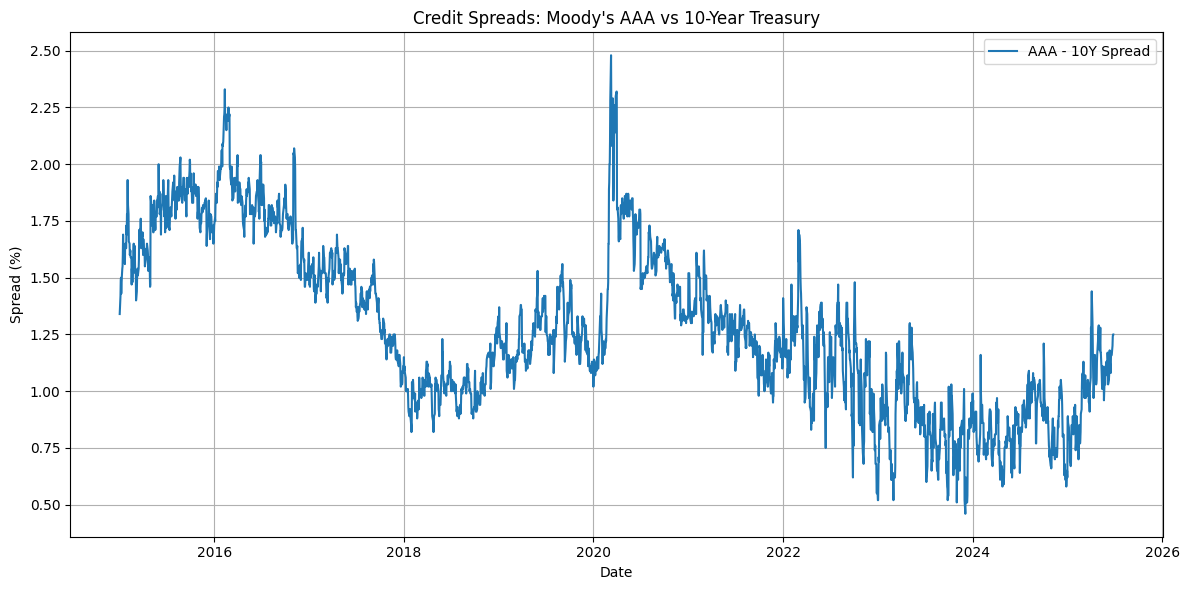

In [13]:
# === Plotly Dashboards ===
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AAA_10Y_Spread'], label='AAA - 10Y Spread')
plt.title("Credit Spreads: Moody's AAA vs 10-Year Treasury")
plt.xlabel("Date")
plt.ylabel("Spread (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

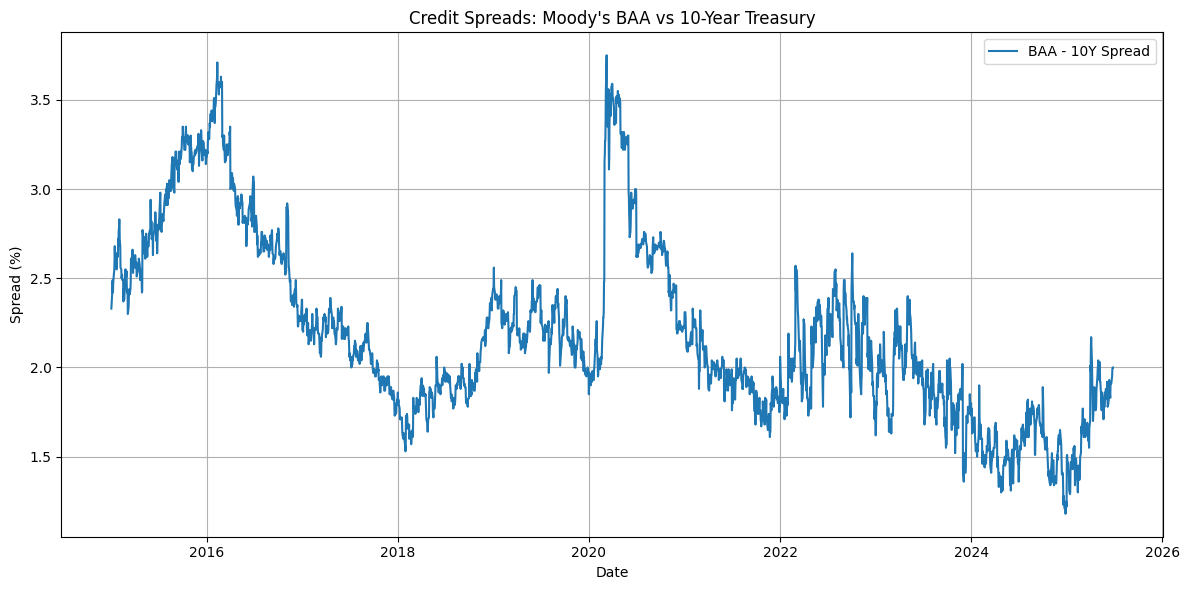

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['BAA_10Y_Spread'], label='BAA - 10Y Spread')
plt.title("Credit Spreads: Moody's BAA vs 10-Year Treasury")
plt.xlabel("Date")
plt.ylabel("Spread (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

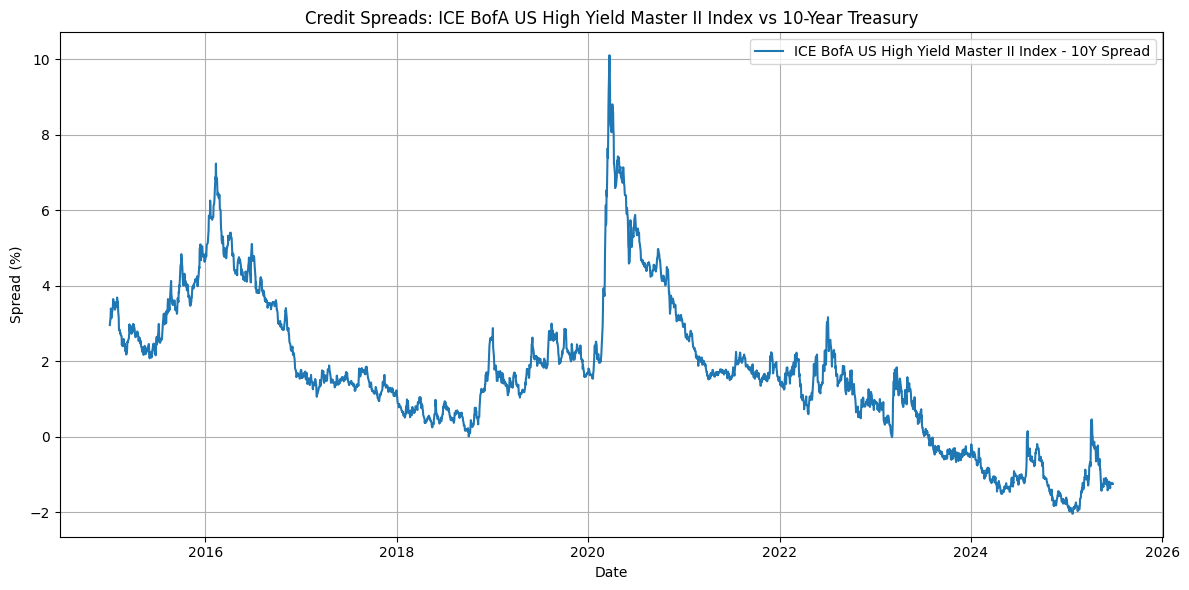

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['HY_10Y_Spread'], label='ICE BofA US High Yield Master II Index - 10Y Spread')
plt.title("Credit Spreads: ICE BofA US High Yield Master II Index vs 10-Year Treasury")
plt.xlabel("Date")
plt.ylabel("Spread (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

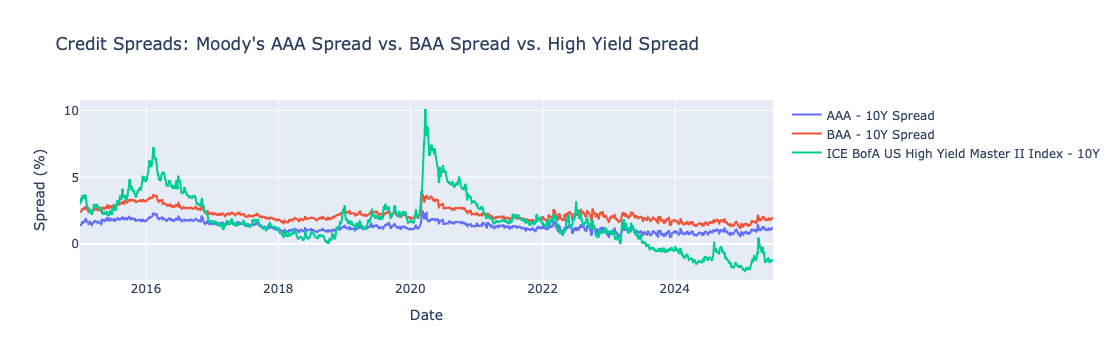

In [16]:
# Interactive plot and charts
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['AAA_10Y_Spread'],
                         mode='lines', name='AAA - 10Y Spread'))
fig.add_trace(go.Scatter(x=df.index, y=df['BAA_10Y_Spread'],
                         mode='lines', name='BAA - 10Y Spread'))
fig.add_trace(go.Scatter(x=df.index, y=df['HY_10Y_Spread'], name='ICE BofA US High Yield Master II Index - 10Y'))
fig.update_layout(title="Credit Spreads: Moody's AAA Spread vs. BAA Spread vs. High Yield Spread",
                  xaxis_title='Date', yaxis_title='Spread (%)', hovermode='x unified')
fig.show()